In [1]:
import numpy as np
import pandas as pd


In [2]:
trans = pd.DataFrame({"A":[12, 4, 5, None, 1],
                      "B":[7, 2, 54, 3, None],
                      "C":[20, 16, 11, 3, 8],
                      "D":[14, 3, None, 2, 6]},
                     index=['Row_1', 'Row_2', 'Row_3', 'Row_4', 'Row_5'])
trans


,A,B,C,D
Row_1,12.0,7.0,20,14.0
Row_2,4.0,2.0,16,3.0
Row_3,5.0,54.0,11,NaN
Row_4,NaN,3.0,3,2.0
Row_5,1.0,NaN,8,6.0


In [3]:
result = trans.transform(lambda x: x + 10)
result


,A,B,C,D
Row_1,22.0,17.0,30,24.0
Row_2,14.0,12.0,26,13.0
Row_3,15.0,64.0,21,NaN
Row_4,NaN,13.0,13,12.0
Row_5,11.0,NaN,18,16.0


In [4]:
# 10 random numbers from 10-200
x = np.random.randint(10, 200, size=10)
x

array([179,  21, 179,  79,  80, 103,  97,  67, 192,  98])

In [5]:
np.digitize(x,bins=[50])


array([1, 0, 1, 1, 1, 1, 1, 1, 1, 1])

In [6]:
np.digitize(x, bins=[50, 100])


array([2, 0, 2, 1, 1, 2, 1, 1, 2, 1])

In [7]:
df = pd.DataFrame({'height': x})
df


,height
0,179
1,21
2,179
3,79
4,80
5,103
6,97
7,67
8,192
9,98


In [8]:
df['binned'] = pd.cut(x=df['height'], bins=[0, 25, 50, 100, 200])
df


,height,binned
0,179,"(100, 200]"
1,21,"(0, 25]"
2,179,"(100, 200]"
3,79,"(50, 100]"
4,80,"(50, 100]"
5,103,"(100, 200]"
6,97,"(50, 100]"
7,67,"(50, 100]"
8,192,"(100, 200]"
9,98,"(50, 100]"


In [9]:
df['bin_label'] = pd.cut(x = df['height'],
                         bins = [0, 25, 50, 100, 200],
                         labels = [1, 2, 3, 4])
df


,height,binned,bin_label
0,179,"(100, 200]",4
1,21,"(0, 25]",1
2,179,"(100, 200]",4
3,79,"(50, 100]",3
4,80,"(50, 100]",3
5,103,"(100, 200]",4
6,97,"(50, 100]",3
7,67,"(50, 100]",3
8,192,"(100, 200]",4
9,98,"(50, 100]",3


In [10]:
pd.qcut(df['height'], q=5)


0    (100.0, 179.0]
1    (20.999, 76.6]
2    (100.0, 179.0]
3      (76.6, 90.2]
4      (76.6, 90.2]
5    (100.0, 179.0]
6     (90.2, 100.0]
7    (20.999, 76.6]
8    (179.0, 192.0]
9     (90.2, 100.0]
Name: height, dtype: category
Categories (5, interval[float64]): [(20.999, 76.6] < (76.6, 90.2] < (90.2, 100.0] < (100.0, 179.0] < (179.0, 192.0]]

In [11]:
degrees = ['None', 'cum laude', 'magna cum laude', 'summa cum laude']
student_results = [3.93, 3.24, 2.80, 2.83, 3.91, 3.698, 3.731, 3.25, 3.24, 3.82, 3.22]
student_results.sort(reverse=True)

student_results_degrees = pd.cut(student_results, [0, 3.6, 3.8, 3.9, 4.0], labels=degrees)
honor = pd.DataFrame({'grades': student_results,
                      'honors': student_results_degrees})
honor


,grades,honors
0,3.930,summa cum laude
1,3.910,summa cum laude
2,3.820,magna cum laude
3,3.731,cum laude
4,3.698,cum laude
5,3.250,None
6,3.240,None
7,3.240,None
8,3.220,None
9,2.830,None


<AxesSubplot:>

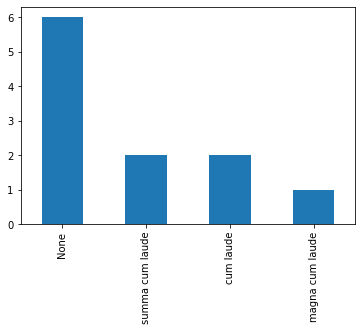

In [15]:
pd.value_counts(student_results_degrees).plot.bar()
